## Problem Set 7: Simulating the Spread of Disease and Virus Population 

In [7]:
from random import random
import matplotlib
%matplotlib inline

In [9]:
class NoChildException(Exception):
    pass

class SimpleVirus(object):
    """
    Representation of a simple virus (does not model drug
    effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.
        maxBirthProb: Maximum reproduction probability (a float between 0-1)
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def doesClear(self):
        """
        Stochastically determines whether this virus particle is cleared from
        the patient's body at a time step.
        returns: True with probability self.clearProb and otherwise returns False.
        """
        return True if self.clearProb > random() else False

    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the SimplePatient and
        Patient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        If this virus particle reproduces, then reproduce() creates and
        returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).
        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        if (self.maxBirthProb * (1 - popDensity)) > random():
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        else:
            raise NoChildException('No child is being created')

In [21]:
class SimplePatient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """
    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.
        viruses: The list representing the virus population (a list of
        SimpleVirus instances)
        maxPop: The maximum virus population for this patient (an integer)
        """ 
        self.viruses = viruses
        self.maxPop = maxPop

    def getTotalPop(self):
        """
        Gets the current total virus population.
        returns: The total virus population (an integer)
        """
        return len(self.viruses)

    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.
        - The current population density is calculated. This population
        density value is used until the next call to update()
        - Determine whether each virus particle should reproduce and add
        offspring virus particles to the list of viruses in this patient.
        returns: the total virus population at the end of the update (an
        integer)
        """
        remaining_virus_population = []
        children = []
        for virus in self.viruses:
            if not virus.doesClear():
                remaining_virus_population.append(virus)
        self.viruses = remaining_virus_population
        current_population_density = self.getTotalPop() / self.maxPop
        for current_virus in self.viruses:
            try:
                children.append(current_virus.reproduce(current_population_density))
            except NoChildException:
                continue
        self.viruses = self.viruses + children

In [57]:
def simulationWithoutDrug():
    """
    Run the simulation and plot the graph for problem 2 (no drugs are used,
    viruses do not have any drug resistance).    
    Instantiates a patient, runs a simulation for 300 timesteps, and plots the
    total virus population as a function of time.    
    """
    viruses = []
    max_pop = 1000
    for i in range (100):
        viruses.append(SimpleVirus(0.1, 0.05))
    patient = SimplePatient(viruses, max_pop)
    x_axis = []
    y_axis = []
    for step in range(300):
        x_axis.append(step)
        y_axis.append(patient.getTotalPop())
        patient.update()
    return x_axis, y_axis

In [101]:
def averageSimulationsWithoutDrug():
    x_result = []
    y_data = []
    y_result = []
    for q in range (100):
        x, y = simulationWithoutDrug()
        if len(x_result) == 0:
            x_result = x
        y_data.append(y)
    for y_row in range (len(y_data[0])):
        y_sum = 0 
        for y_column in range (len(y_data)):
            y_sum += y_data[y_column][y_row]
        y_result.append(y_sum / len(y_data[0]))
    print(len(y_result))
    matplotlib.pyplot.scatter(x_result, y_result)

300


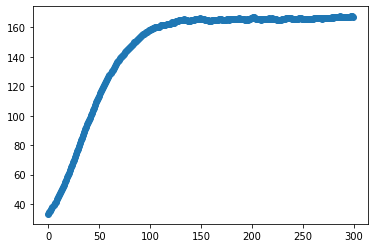

In [103]:
averageSimulationsWithoutDrug()